# Cargar librerías

In [1]:
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import seaborn as sns

from sklearn.model_selection import train_test_split
from sklearn.feature_selection import mutual_info_regression
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

from statsmodels.stats.outliers_influence import variance_inflation_factor


# Cargar datos

In [2]:
# Configurar pandas para mostrar más columnas
pd.set_option('display.max_columns', 50)  
# Configurar la anchura máxima de la columna y la anchura máxima total de la visualización
pd.set_option('display.max_colwidth', 100)  # Aumenta o disminuye según la necesidad
pd.set_option('display.width', 1000)        # Ajusta a la anchura de tu pantalla o salida

data = pd.read_csv("../DATA/creditcardfraud_normalised.csv")
data[data.columns[:28]] = data[data.columns[:28]].astype("float32")

X = data.drop('class', axis=1)  # Reemplaza 'target' por el nombre de tu variable objetivo
y = data['class']

In [4]:
print("Número de filas: ", data.shape[0])
print("Número de columnas: ", data.shape[1])
print("Número de valores faltantes totales: ", data.isnull().sum().sum())

Número de filas:  284807
Número de columnas:  30
Número de valores faltantes totales:  0


A pesar de tratarse de un problema de clasificación observamos un gran desbalanceo de clases, por lo que usar técnicas de aprendizaje supervisado no es la mejor opción como veremos más adelante

In [5]:
print("Total de transacciones fraudulentas: ", y.value_counts()[1])
print("Total de transacciones NO fraudulentas: ", y.value_counts()[0])

Total de transacciones fraudulentas:  492
Total de transacciones NO fraudulentas:  284315


In [14]:
data.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
0,0.935192,0.766490,0.881365,0.313023,0.763439,0.267669,0.266815,0.786444,0.475312,0.510600,0.252484,0.680908,0.371591,0.635591,0.446084,0.434392,0.737173,0.655066,0.594863,0.582942,0.561184,0.522992,0.663793,0.391253,0.585122,0.394557,0.418976,0.312697,0.005824,0
1,0.978542,0.770067,0.840298,0.271796,0.766120,0.262192,0.264875,0.786298,0.453981,0.505267,0.381188,0.744342,0.486190,0.641219,0.383840,0.464105,0.727794,0.640681,0.551930,0.579530,0.557840,0.480237,0.666938,0.336440,0.587290,0.446013,0.416345,0.313423,0.000105,0
2,0.935217,0.753118,0.868141,0.268766,0.762329,0.281122,0.270177,0.788042,0.410603,0.513018,0.322422,0.706683,0.503854,0.640473,0.511697,0.357443,0.763381,0.644945,0.386683,0.585855,0.565477,0.546030,0.678939,0.289354,0.559515,0.402727,0.415489,0.311911,0.014739,0
3,0.941878,0.765304,0.868484,0.213661,0.765647,0.275559,0.266803,0.789434,0.414999,0.507585,0.271817,0.710910,0.487635,0.636372,0.289124,0.415653,0.711253,0.788492,0.467058,0.578050,0.559734,0.510277,0.662607,0.223826,0.614245,0.389197,0.417669,0.314371,0.004807,0
4,0.938617,0.776520,0.864251,0.269796,0.762975,0.263984,0.268968,0.782484,0.490950,0.524303,0.236355,0.724477,0.552509,0.608406,0.349419,0.434995,0.724243,0.650665,0.626060,0.584615,0.561327,0.547271,0.663392,0.401270,0.566343,0.507497,0.420561,0.317490,0.002724,0


In [15]:
data.describe()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,V11,V12,V13,V14,V15,V16,V17,V18,V19,V20,V21,V22,V23,V24,V25,V26,V27,V28,Amount,class
count,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000,284807.000000
mean,0.958294,0.767258,0.837414,0.251930,0.765716,0.263020,0.265355,0.785386,0.462780,0.508722,0.285286,0.704193,0.448331,0.646053,0.336327,0.449352,0.731130,0.653292,0.563315,0.580265,0.561479,0.510031,0.665434,0.382234,0.577907,0.425448,0.416511,0.313124,0.003439,0.001727
std,0.033276,0.017424,0.026275,0.062764,0.009292,0.013395,0.007537,0.012812,0.037846,0.022528,0.060698,0.037660,0.077041,0.032231,0.068426,0.027866,0.024678,0.057647,0.063570,0.008208,0.011841,0.033854,0.009274,0.081611,0.029261,0.078771,0.007450,0.006698,0.009736,0.041527
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.942658,0.760943,0.821985,0.214311,0.761061,0.255295,0.261980,0.783148,0.440626,0.497644,0.239943,0.688907,0.398129,0.631744,0.292753,0.434467,0.717074,0.618983,0.527681,0.578011,0.557798,0.484730,0.663030,0.334454,0.560105,0.372036,0.415203,0.312049,0.000218,0.000000
50%,0.958601,0.767949,0.840530,0.251050,0.765351,0.260263,0.265600,0.785625,0.461008,0.506800,0.283338,0.709471,0.447281,0.647755,0.339921,0.451464,0.729221,0.653042,0.563607,0.579600,0.561005,0.510347,0.665267,0.387756,0.578838,0.416932,0.416536,0.313352,0.000856,0.000000
75%,0.980645,0.775739,0.855213,0.284882,0.769836,0.267027,0.268831,0.788897,0.483350,0.518113,0.329266,0.727494,0.499613,0.662635,0.384831,0.465993,0.742743,0.687736,0.599155,0.581682,0.564484,0.534688,0.667626,0.441460,0.597593,0.464807,0.418191,0.314712,0.003004,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


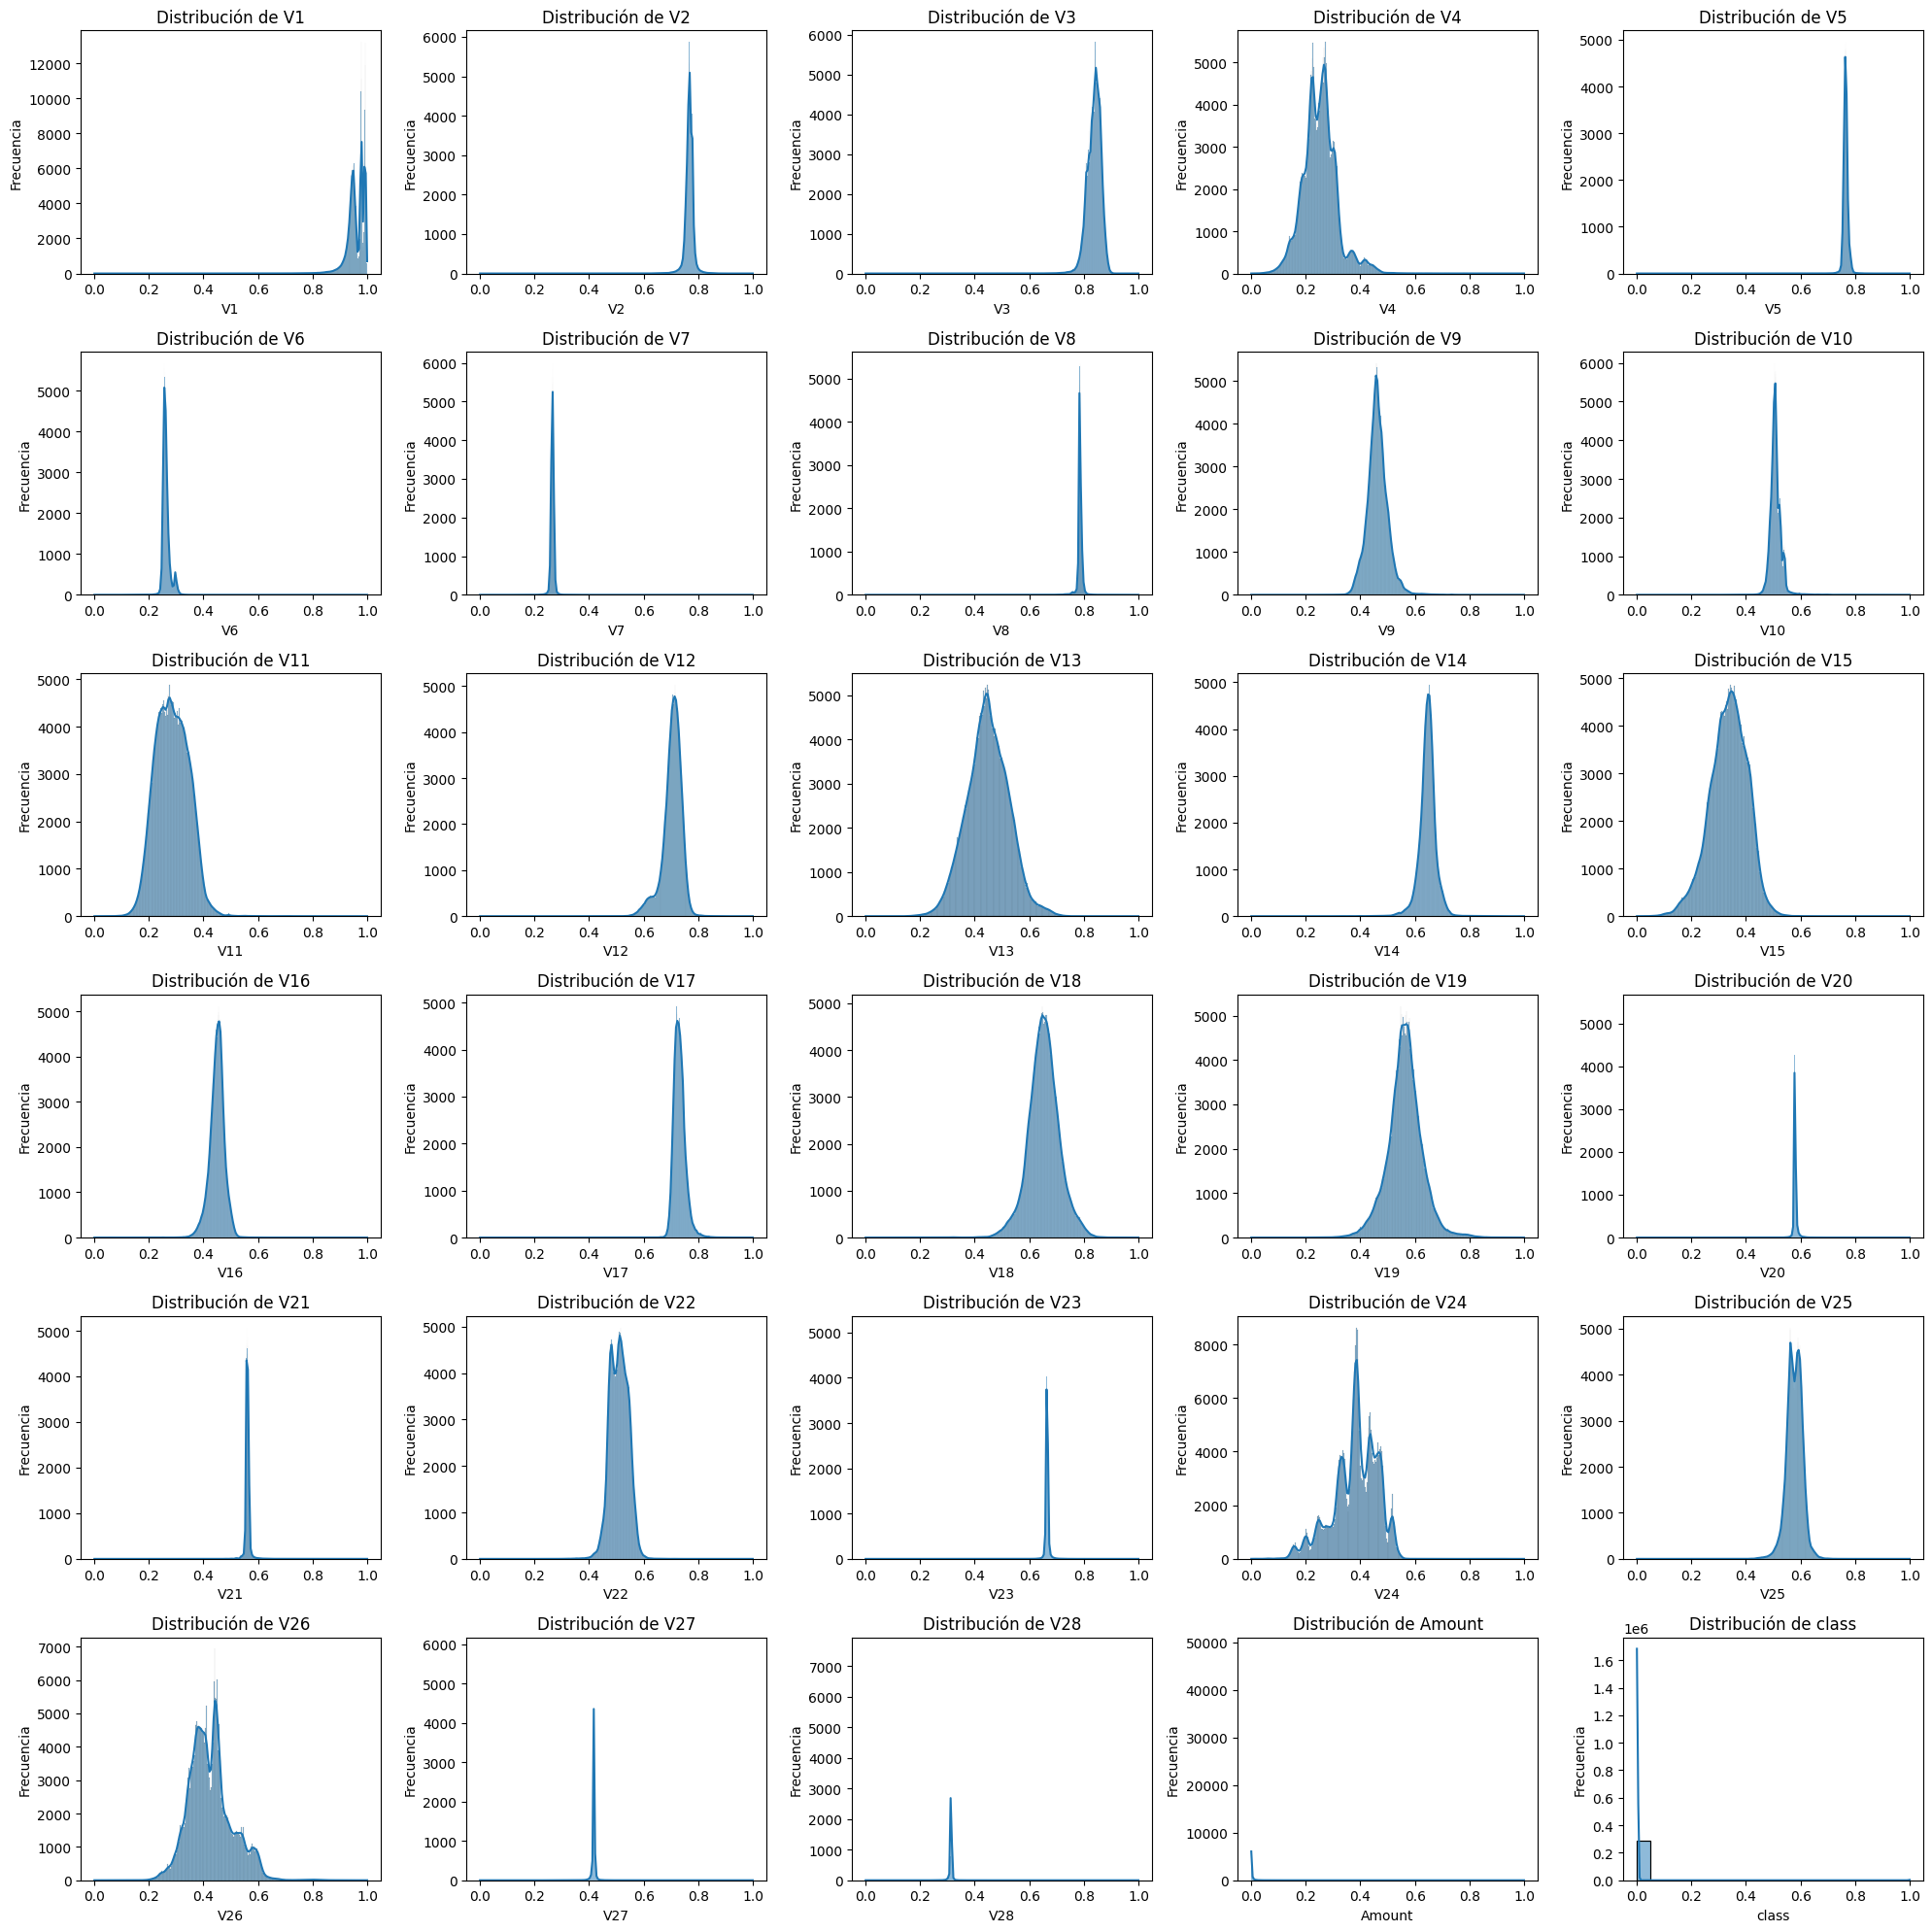

In [16]:
# Crear una figura con subgráficos
fig, axes = plt.subplots(6, 5, figsize=(20, 20))  # Ajusta el tamaño como necesario

# Aplanar la matriz de ejes para facilitar la iteración si hay más de una fila
axes = axes.flatten()

# Iterar a través de todas las columnas del DataFrame y crear un gráfico para cada una
for i, column in enumerate(data.columns):
    sns.histplot(data[column], kde=True, ax=axes[i])
    axes[i].set_title(f'Distribución de {column}')
    axes[i].set_xlabel(column)
    axes[i].set_ylabel('Frecuencia')

# Ajustar la visualización y mostrar el gráfico
plt.tight_layout()
plt.show()

Observamos que normalizar los datos no es la mejor opción, ya que la mayoría de variables no siguen una distribución normal

# Separar en entrenamiento, validación y test

In [8]:
# Dividir los datos en conjuntos de entrenamiento y prueba
X_train, X_test, Y_train, Y_test = train_test_split(X, y, test_size=0.1, random_state=42, shuffle = True)
X_train, X_val, Y_train, Y_val = train_test_split(X, y, test_size=0.2, random_state=42, shuffle = True)

print("Dimensión de X_train", X_train.shape)
print("Dimensión de X_val", X_val.shape)
print("Dimensión de X_test", X_test.shape)
print("\n")
print("Dimensión de Y_train", Y_train.shape)
print("Dimensión de Y_val", Y_val.shape)
print("Dimensión de Y_test", Y_test.shape)

Dimensión de X_train (227845, 29)
Dimensión de X_val (56962, 29)
Dimensión de X_test (28481, 29)


Dimensión de Y_train (227845,)
Dimensión de Y_val (56962,)
Dimensión de Y_test (28481,)


# Selección de características


## CORRELACIÓN

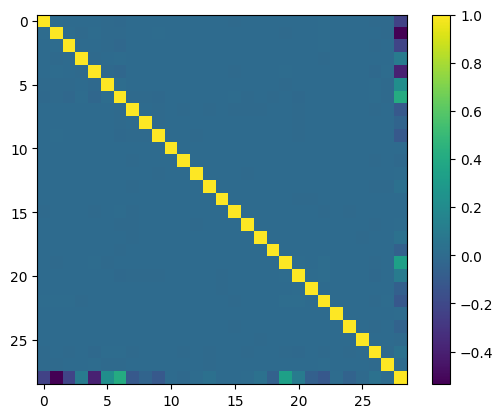

In [18]:
correlacion_var_entr=np.corrcoef(X_train,rowvar=False)
plt.imshow(correlacion_var_entr)
plt.colorbar()

In [19]:
umbral_correlacion=0.8
m = correlacion_var_entr.copy()
m = np.triu(correlacion_var_entr,k=1) #we keep upper diagonal indices
m2 = m.flatten()
whgood = np.argwhere(m2 > umbral_correlacion)
#print(m2[whgood]) #1D indices which respect the provided threshold

#or if you want to preserve all the dimesions information
whgood2=np.argwhere(m > umbral_correlacion)
#print(whgood2)  #2D indices which respect the provided threshold

In [20]:
#Lista con la relación de variables de entrada con correlación superior al umbral
list_entrad_cor = []
umbral_correlacion=0.8

#Recorremos la correlación obtenida entre las variables de entrada:
for i in range(len(correlacion_var_entr)):
    for j in range(i+1,len(correlacion_var_entr[i])): # Evito correlaciones con la misma variable
        #Fijamos umbral de correlación
        if (1>np.abs(correlacion_var_entr[i,j])>umbral_correlacion):

            #guardar variables correlacionadas
            par = str(i)+str(' ')+str(j)+str(' ')+str(np.abs(correlacion_var_entr[i,j]))

            list_entrad_cor.append(par)

In [22]:
print('Pares de variables con correlación superior al umbral:')
for i in list_entrad_cor:
   print(i)

Pares de variables con correlación superior al umbral:


## INFORMACIÓN MUTUA

In [23]:
import pandas as pd
import numpy as np
from sklearn.feature_selection import mutual_info_regression
from joblib import Parallel, delayed

# Supongamos que tienes un DataFrame df con todas las columnas numéricas
columns = data.columns
n = len(columns)

# Función para calcular la información mutua entre dos columnas
def calculate_mi(i, j):
    X = data.iloc[:, i].values.reshape(-1, 1)
    Y = data.iloc[:, j].values
    return mutual_info_regression(X, Y, discrete_features=False)[0]

# Generar combinaciones de índices para las columnas
indices = [(i, j) for i in range(n) for j in range(i+1, n)]

# Paralelizar el cálculo para cada combinación de columnas
results = Parallel(n_jobs=-1)(
    delayed(calculate_mi)(i, j) for i, j in indices
)

# Reconstruir la matriz de información mutua
mutual_info_matrix = np.zeros((n, n))
for idx, (i, j) in enumerate(indices):
    mutual_info_matrix[i, j] = results[idx]
    mutual_info_matrix[j, i] = results[idx]  # Simetría

# Convertir la matriz a un DataFrame para mayor claridad
mutual_info_df = pd.DataFrame(mutual_info_matrix, index=columns, columns=columns)


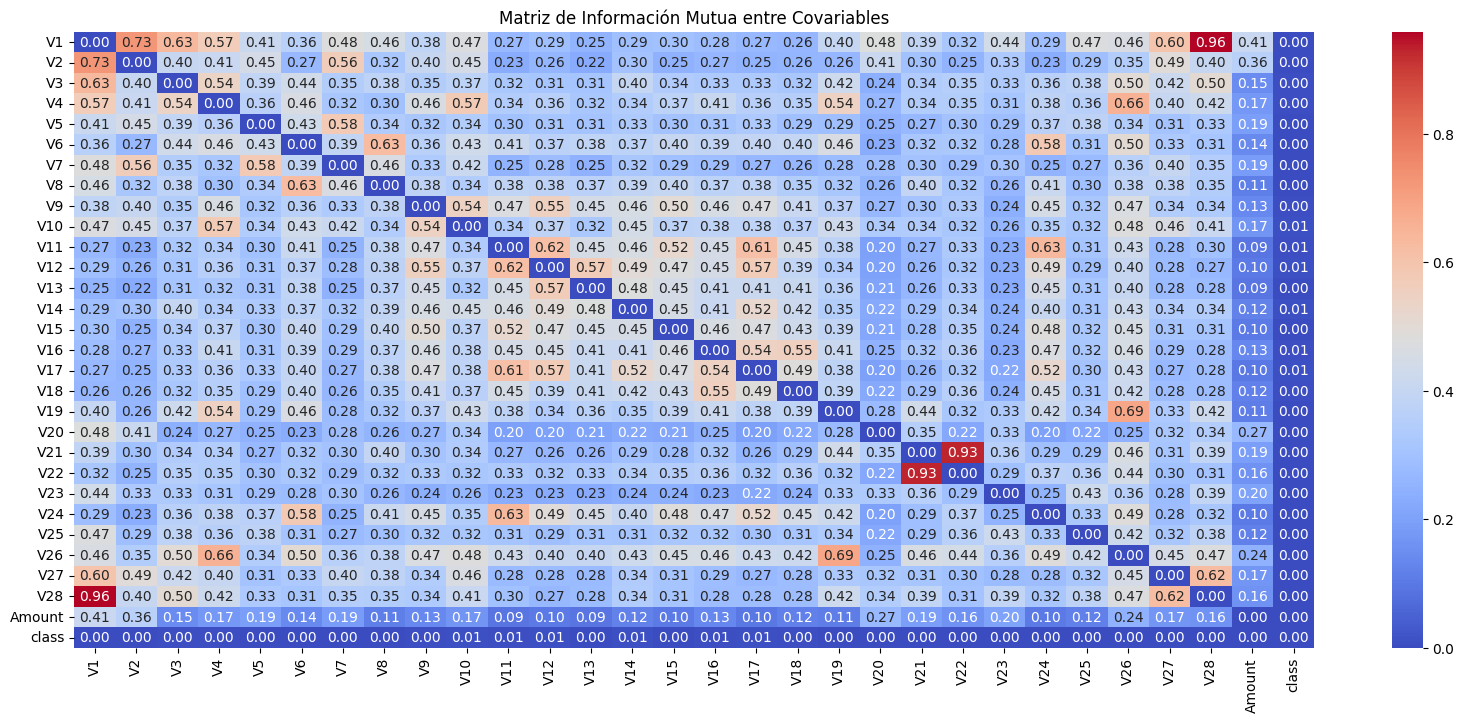

In [24]:
plt.figure(figsize=(20, 8))
sns.heatmap(mutual_info_df, annot=True, fmt=".2f", cmap="coolwarm", cbar=True)
plt.title("Matriz de Información Mutua entre Covariables")
plt.show()

## FACTOR DE INFLACIÓN DE LA VARIANZA

In [27]:
def calcular_vif(df):
    vif_data = pd.DataFrame()
    vif_data["Variable"] = df.columns
    vif_data["VIF"] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
    return vif_data

In [28]:
vif_resultado = calcular_vif(pd.DataFrame(X_train))


In [29]:
variables = pd.DataFrame(vif_resultado[vif_resultado['VIF'] < 25]['VIF'])
variables

,VIF
3,18.576658
10,23.070148
23,22.953766
28,9.447406


In [30]:
#guardamos las posiciones de las variables para hacer el modelo
np.array(variables.index)

array([ 3, 10, 23, 28])

## PCA

# MODELADO

## APRENDIZAJE SUPERVISADO

### SVM

### RANDOM FOREST

### MULTILAYER PERCEPTRON

## APRENDIZAJE NO SUPERVISADO

## DBSCAN

## AUTOENCODERS